In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

滑らかなグラフを作りましょう。各点に関してガウス分布を作って足しあわせます。

In [2]:
dataset = randn(25)

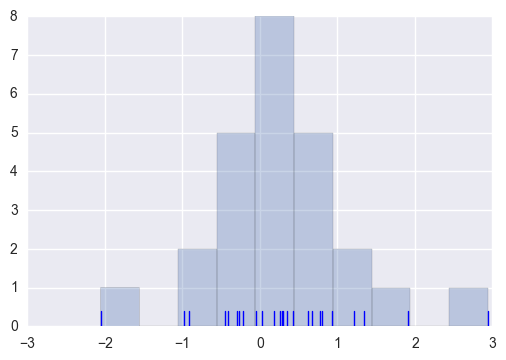

In [3]:
plt.hist(dataset, alpha=.3)
sns.rugplot(dataset)

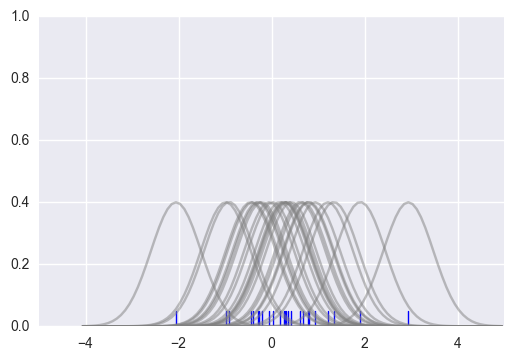

In [4]:
sns.rugplot(dataset)
x_min = dataset.min() - 2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5/(3*len(dataset))))**0.2

kernel_list = []
for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel/kernel.max()
    kernel = kernel*.4
    plt.plot(x_axis,kernel, color = "grey",alpha=.5)

    plt.ylim(0,1)

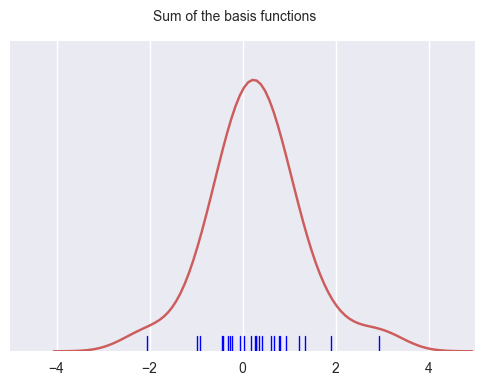

In [5]:
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde, color="indianred")
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle('Sum of the basis functions')

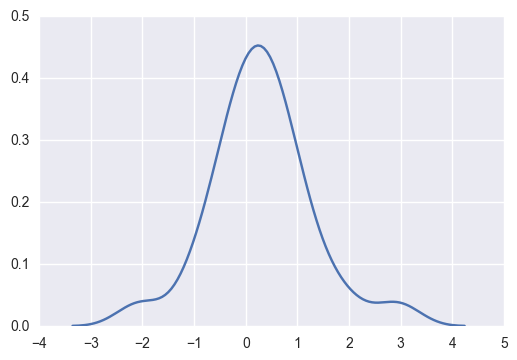

In [6]:
sns.kdeplot(dataset)

In [7]:
dataset

array([-0.40943288,  2.93991691,  0.77921179,  0.61699559,  0.34837972,
        1.21179325,  1.90882273, -0.05391365, -0.44761308, -0.21628362,
        0.30003914,  1.3374596 , -0.26812133, -0.98525962,  0.80157657,
        0.66989055,  0.2583504 ,  0.28209587, -0.3020797 ,  0.93481828,
        0.18021215,  0.02301262, -2.05649144, -0.91268512,  0.42264388])

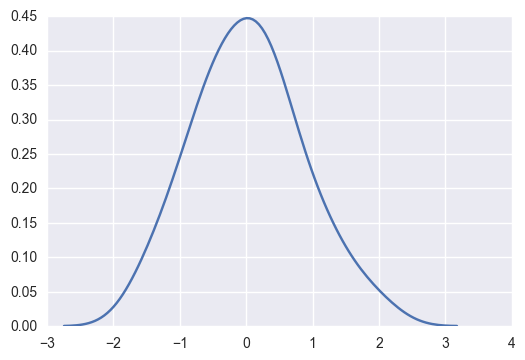

In [8]:
mean, cov = [0, 2], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T
ax = sns.kdeplot(x)


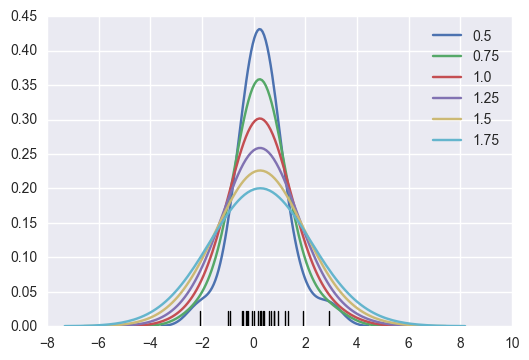

In [11]:
sns.rugplot(dataset,color='black')
for bw in np.arange(0.5,2,.25):
    sns.kdeplot(dataset, bw=bw, label=bw)

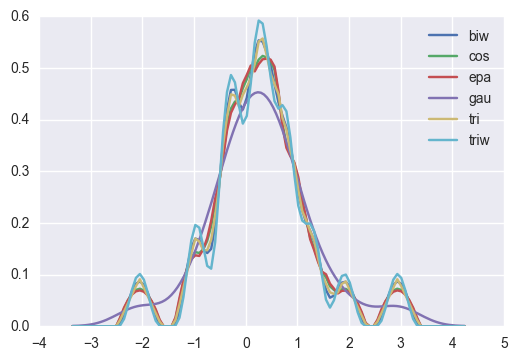

In [12]:
kernel_options=['biw','cos','epa','gau','tri','triw']
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

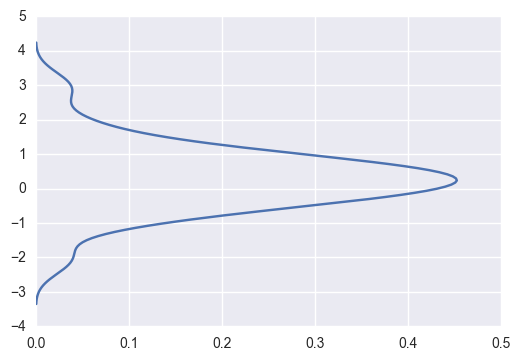

In [13]:
sns.kdeplot(dataset,vertical=True)

(array([  1.,   1.,   3.,   8.,  16.,  21.,  23.,  24.,  24.,  25.]),
 array([-2.05649144, -1.55685061, -1.05720977, -0.55756894, -0.0579281 ,
         0.44171273,  0.94135357,  1.44099441,  1.94063524,  2.44027608,
         2.93991691]),
 <a list of 10 Patch objects>)

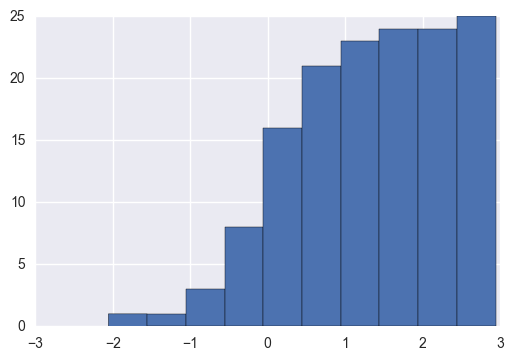

In [15]:
plt.hist(dataset, cumulative=True)

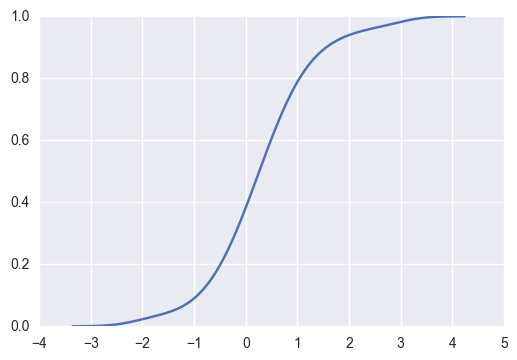

In [16]:
sns.kdeplot(dataset, cumulative=True)

In [17]:
mean = [0,0]
cov = [[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean,cov,1000)

In [18]:
dframe = pd.DataFrame(dataset2, columns = ['X','Y'])

/Users/shotashimizu/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/shotashimizu/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


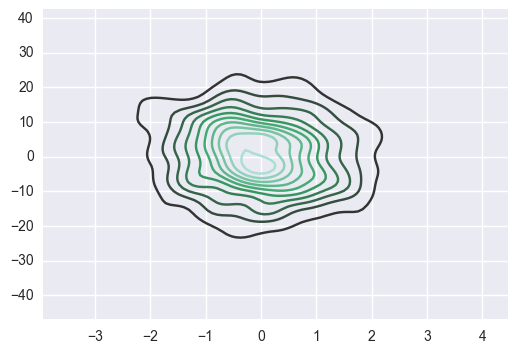

In [19]:
sns.kdeplot(dframe)

/Users/shotashimizu/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/shotashimizu/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


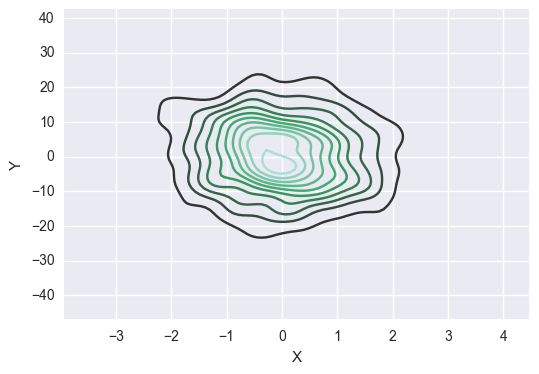

In [20]:
sns.kdeplot(dframe.X,dframe.Y)

/Users/shotashimizu/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/shotashimizu/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


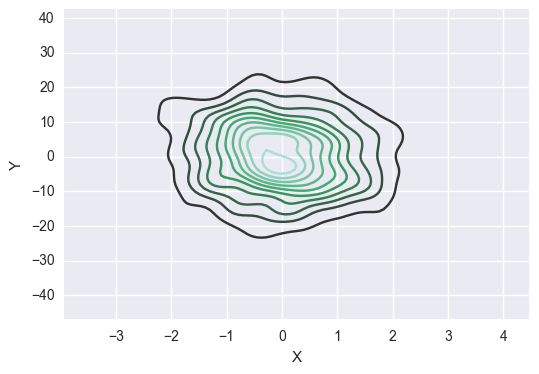

In [21]:
sns.kdeplot(dframe.X,dframe.Y,shadow=True)

/Users/shotashimizu/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/shotashimizu/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


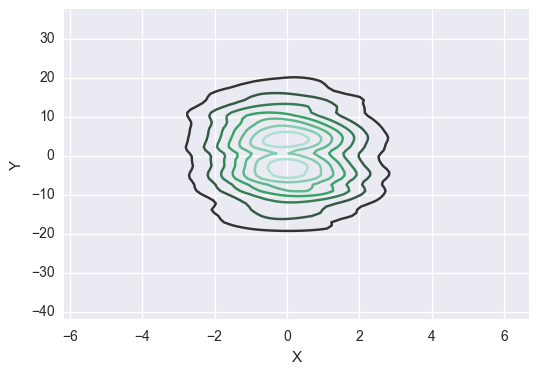

In [22]:
sns.kdeplot(dframe.X,dframe.Y,bw=1)

/Users/shotashimizu/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/shotashimizu/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


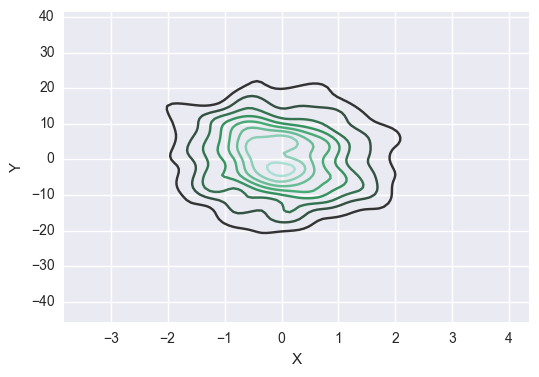

In [23]:
sns.kdeplot(dframe.X,dframe.Y,bw='silverman')

/Users/shotashimizu/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/shotashimizu/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


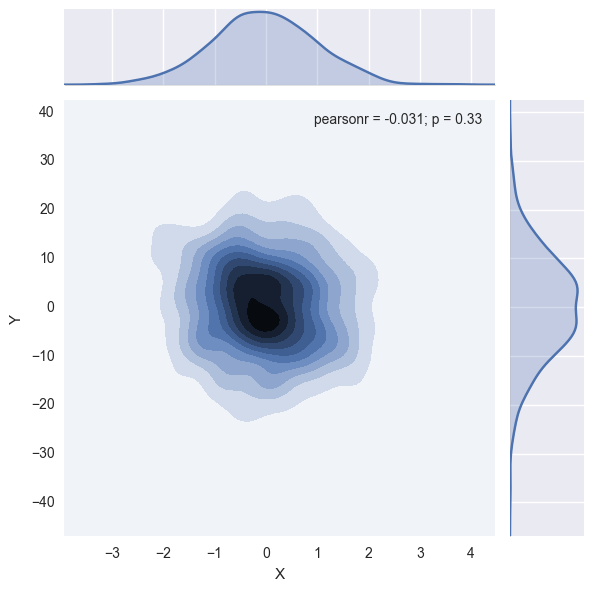

In [24]:
sns.jointplot('X','Y',dframe,kind='kde')